# Level 2

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.ticker as mtick
import matplotlib.lines as lines
import matplotlib.image as mpimg
import matplotlib.colors as mcolors
import seaborn as sn
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [5]:
# visulizaing the missing values
def apply_chart_styling(ax,fig,title,subtitle,insight_text):
    fig.patch.set_facecolor('#f7f7f7') # Background colors
    ax.set_facecolor('#f7f7f7')

    fig.text(0.3,1.05,title,fontsize=30,fontweight='bold',fontfamily="Franklin Gothic Heavy")
    fig.text(0.25,0.99,subtitle,fontsize=25,fontweight='bold',fontfamily='Segoe UI')

    fig.text(1.1,1.01,'Insight',fontsize=24,fontweight='bold',fontfamily="Segoe UI")
    fig.text(1.1,0.50,insight_text,fontsize=22,fontweight='light',fontfamily='Arial Rounded MT Bold')

    ax.grid(axis='y',linestyle='-',alpha=0.4)
    ax.set_axisbelow('True')

    for spine in ['top','right','left']:
        ax.spines[spine].set_visible(False)

    ax.tick_params(axis = 'both',which = 'major', labelsize = 16)

    l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig, color='black', lw=0.2)
    fig.lines.extend([l1])
palette = ["#FF6B6B", "#4ECDC4", "#FFD93D", "#6A5ACD", "#FF8C42", "#00C9A7"]



In [7]:
df=pd.read_csv("Dataset.csv")

In [8]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## Task 1 : Table Booking and Online Delivery

#### 1.Determine the percentage of restaurants that offer table booking and online delivery.

In [9]:
df['Has Table booking'].value_counts()

Has Table booking
No     8393
Yes    1158
Name: count, dtype: int64

In [10]:
df['Has Online delivery'].value_counts()

Has Online delivery
No     7100
Yes    2451
Name: count, dtype: int64

In [11]:
#The percentage of restaurants that offer table booking
restaurants_count=df[(df['Has Table booking']=='Yes')].shape[0]

percnt=(restaurants_count/df.shape[0])*100
print("The percentage of restaurants that offer table booking : ",percnt)

The percentage of restaurants that offer table booking :  12.124384881164275


In [12]:
#The percentage of restaurants that offer online delivery.
restaurants_has_delivery=df[(df['Has Online delivery']=='Yes')].shape[0]

percentage=(restaurants_has_delivery/df.shape[0])*100
print("The percentage of restaurants that offer Online Delivery : ",percentage)

The percentage of restaurants that offer Online Delivery :  25.662234321013504


In [13]:
#The percentage of restaurants that offer both table booking & online delivery.
restaurants_has_both=df[(df['Has Table booking']=='Yes') & (df['Has Online delivery']=='Yes')].shape[0]

Total_percentage=(restaurants_has_both/df.shape[0])*100
print("The percentage of restaurants that offer Online Delivery & table booking : ",Total_percentage)

The percentage of restaurants that offer Online Delivery & table booking :  4.554496911318187


In [14]:
percnt_comparison=pd.DataFrame({
    'Category':['Has both','Has Table booking','Has Online delivery'],
    'Percentage':[Total_percentage,percnt,percentage]
}  )

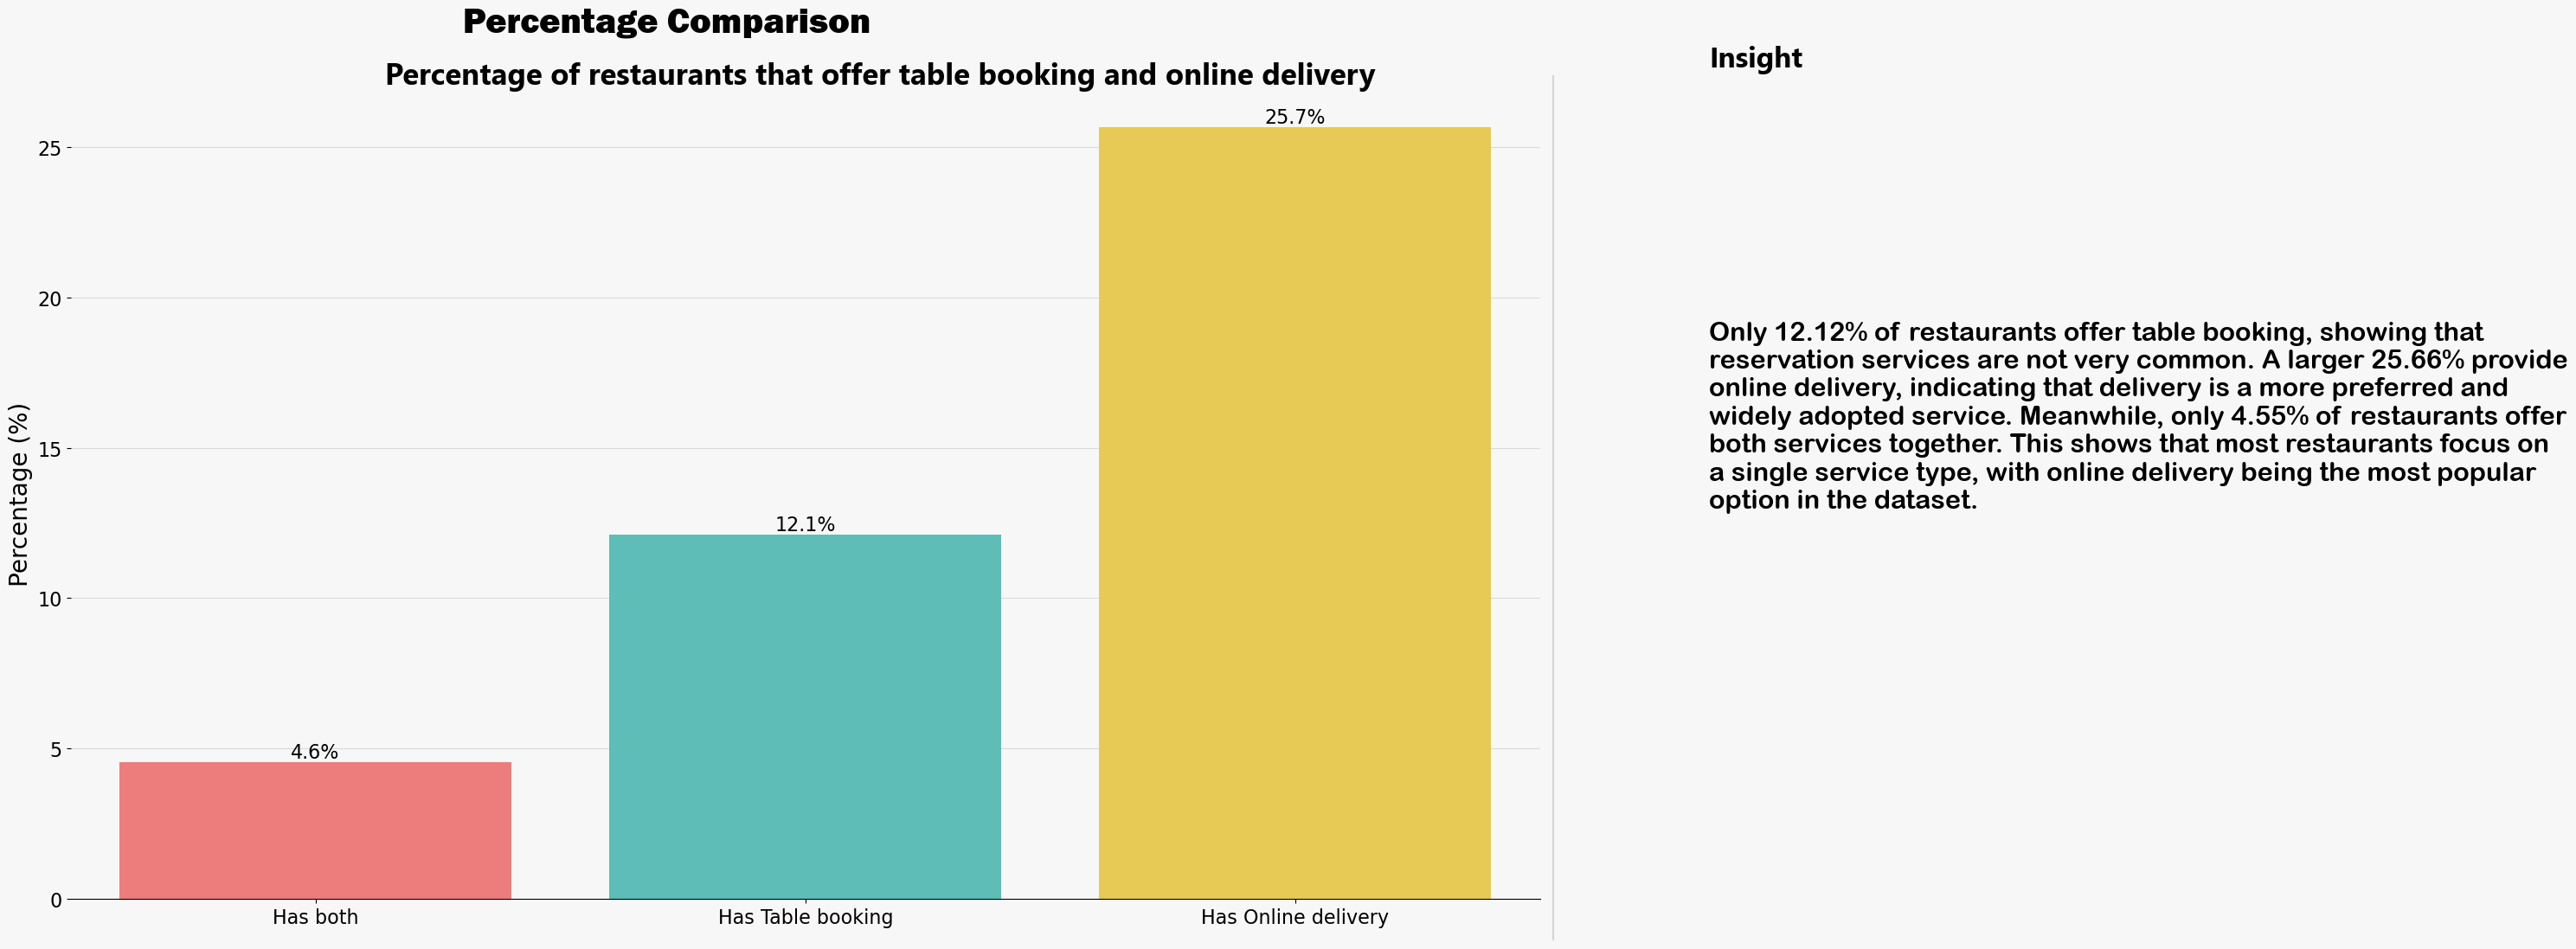

In [50]:
fig,ax=plt.subplots(1,1,figsize=(18,10))
# plot count plot
sns.barplot(data=percnt_comparison, x="Category", y="Percentage", palette=palette)
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%",fontsize=16)
plt.xlabel("",fontsize=20)
plt.ylabel("Percentage (%)",fontsize=20)
# apply chart styling
apply_chart_styling(ax=ax,fig=fig,title="Percentage Comparison",subtitle='Percentage of restaurants that offer table booking and online delivery',insight_text='''Only 12.12% of restaurants offer table booking, showing that
reservation services are not very common. A larger 25.66% provide
online delivery, indicating that delivery is a more preferred and
widely adopted service. Meanwhile, only 4.55% of restaurants offer
both services together. This shows that most restaurants focus on 
a single service type, with online delivery being the most popular
option in the dataset.''')
plt.tight_layout()
plt.show()

#### 2. Compare the average ratings of restaurants with table booking and those without.

In [16]:
# Avg Rating of Restaurants with table booking
rating_with_table_booking=df[df['Has Table booking']=='Yes']['Aggregate rating'].mean()

# Avg Rating of Restaurants without table booking
rating_without_table_booking=df[df['Has Table booking']=='No']['Aggregate rating'].mean()

print("Avg Rating of Restaurants with table booking :",rating_with_table_booking)
print("Avg Rating of Restaurants without table booking :",rating_without_table_booking)

Avg Rating of Restaurants with table booking : 3.4419689119170984
Avg Rating of Restaurants without table booking : 2.559358989634219


In [17]:
p=pd.DataFrame({
    'Category':['Rating_with_table_booking','Rating_without_table_booking'],
    'Avg_rating':[rating_with_table_booking,rating_without_table_booking]
}  )

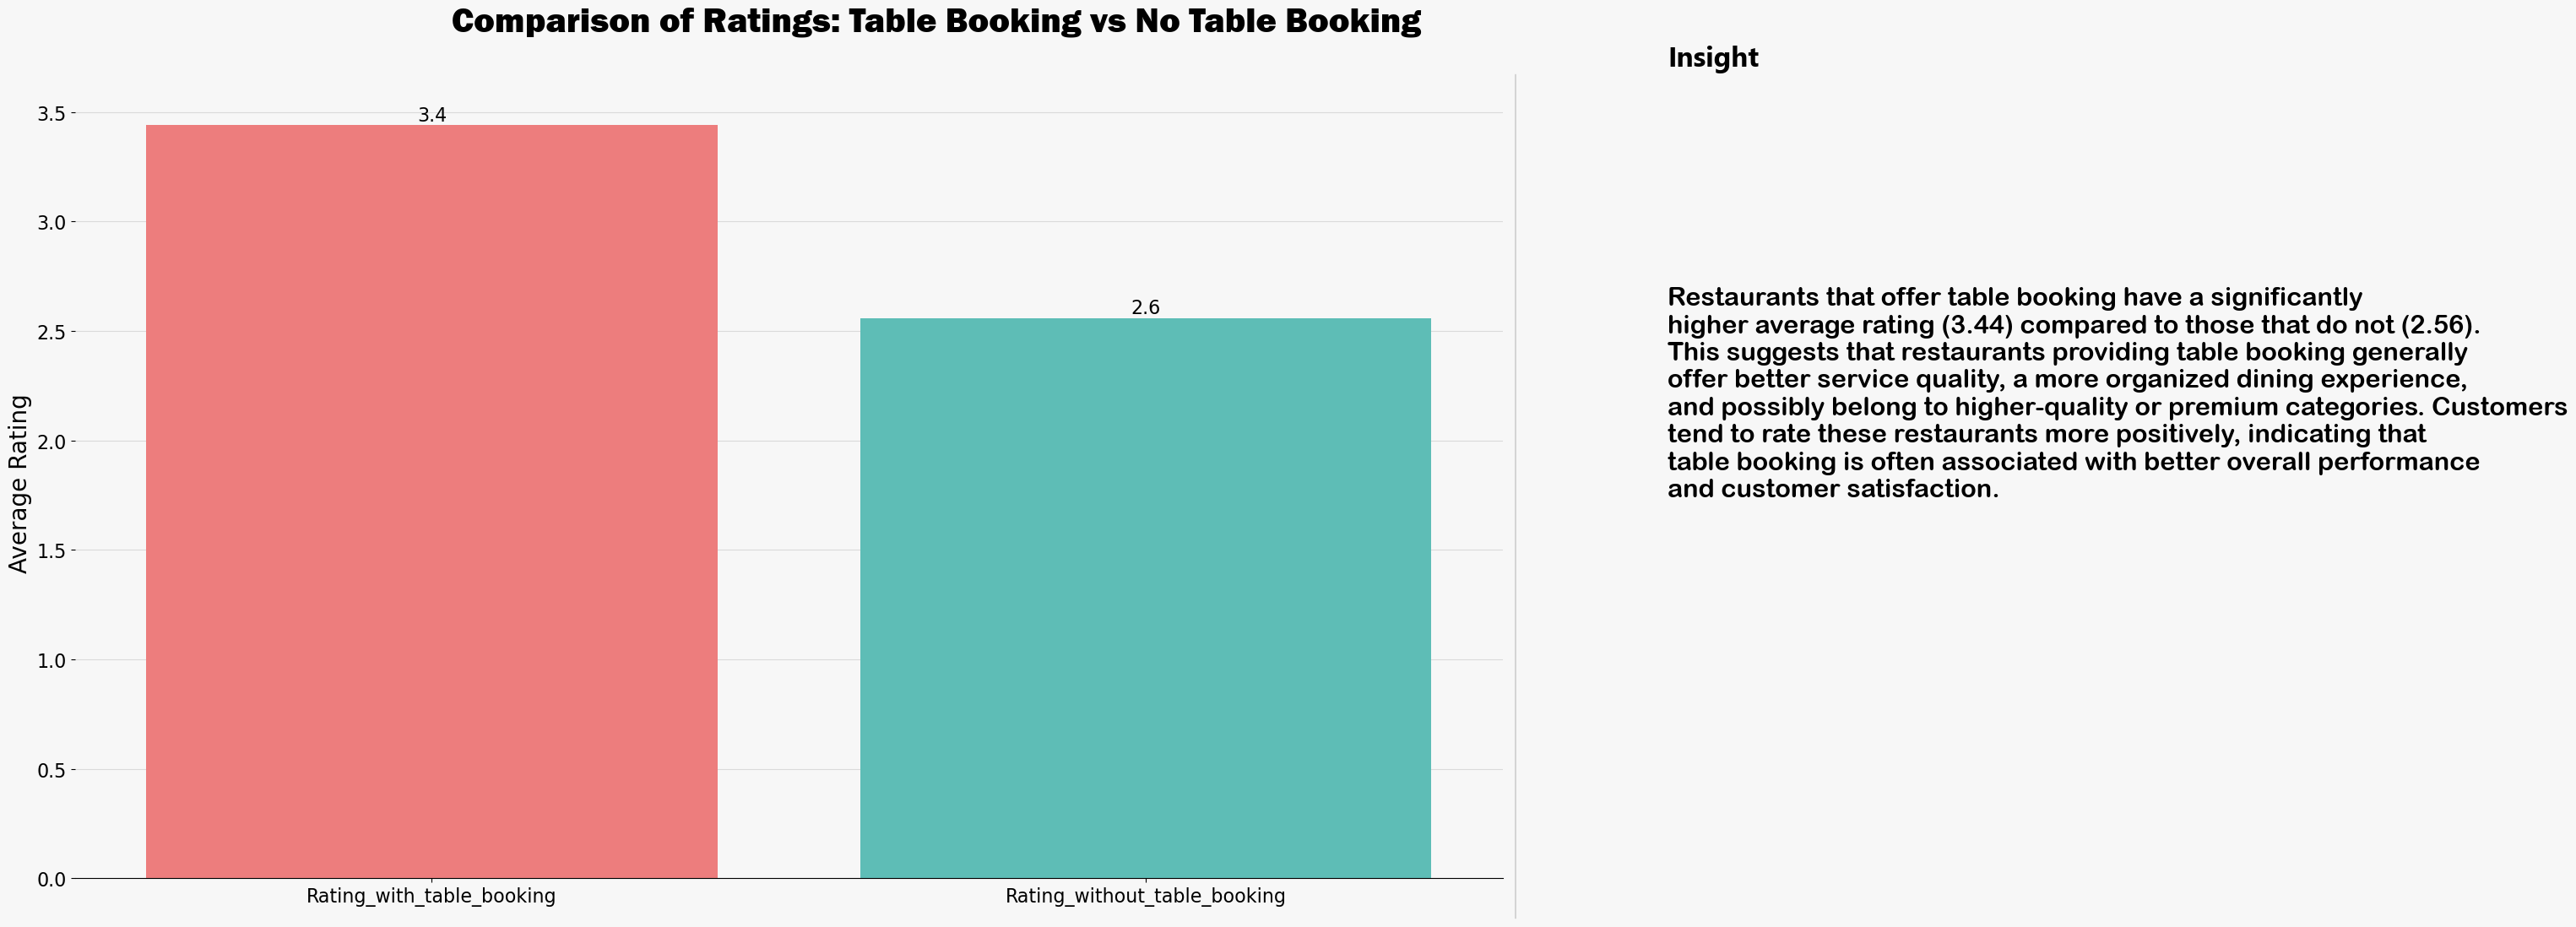

In [48]:
fig,ax=plt.subplots(1,1,figsize=(18,10))
# plot count plot
sns.barplot(data=p, x="Category", y="Avg_rating", palette=palette)
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f",fontsize=16)
plt.xlabel("",fontsize=20)
plt.ylabel("Average Rating",fontsize=20)
# apply chart styling
apply_chart_styling(ax=ax,fig=fig,title="Comparison of Ratings: Table Booking vs No Table Booking",subtitle='',insight_text='''Restaurants that offer table booking have a significantly 
higher average rating (3.44) compared to those that do not (2.56). 
This suggests that restaurants providing table booking generally 
offer better service quality, a more organized dining experience,
and possibly belong to higher-quality or premium categories. Customers
tend to rate these restaurants more positively, indicating that 
table booking is often associated with better overall performance 
and customer satisfaction.''')
plt.tight_layout()
plt.show()

#### 3.Analyze the availability of online delivery among restaurants with different price ranges.

In [19]:
online_delivery_by_price = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack() * 100
online_delivery_by_price


Has Online delivery,No,Yes
Price range,,
1,84.225923,15.774077
2,58.689367,41.310633
3,70.809659,29.190341
4,90.955631,9.044369


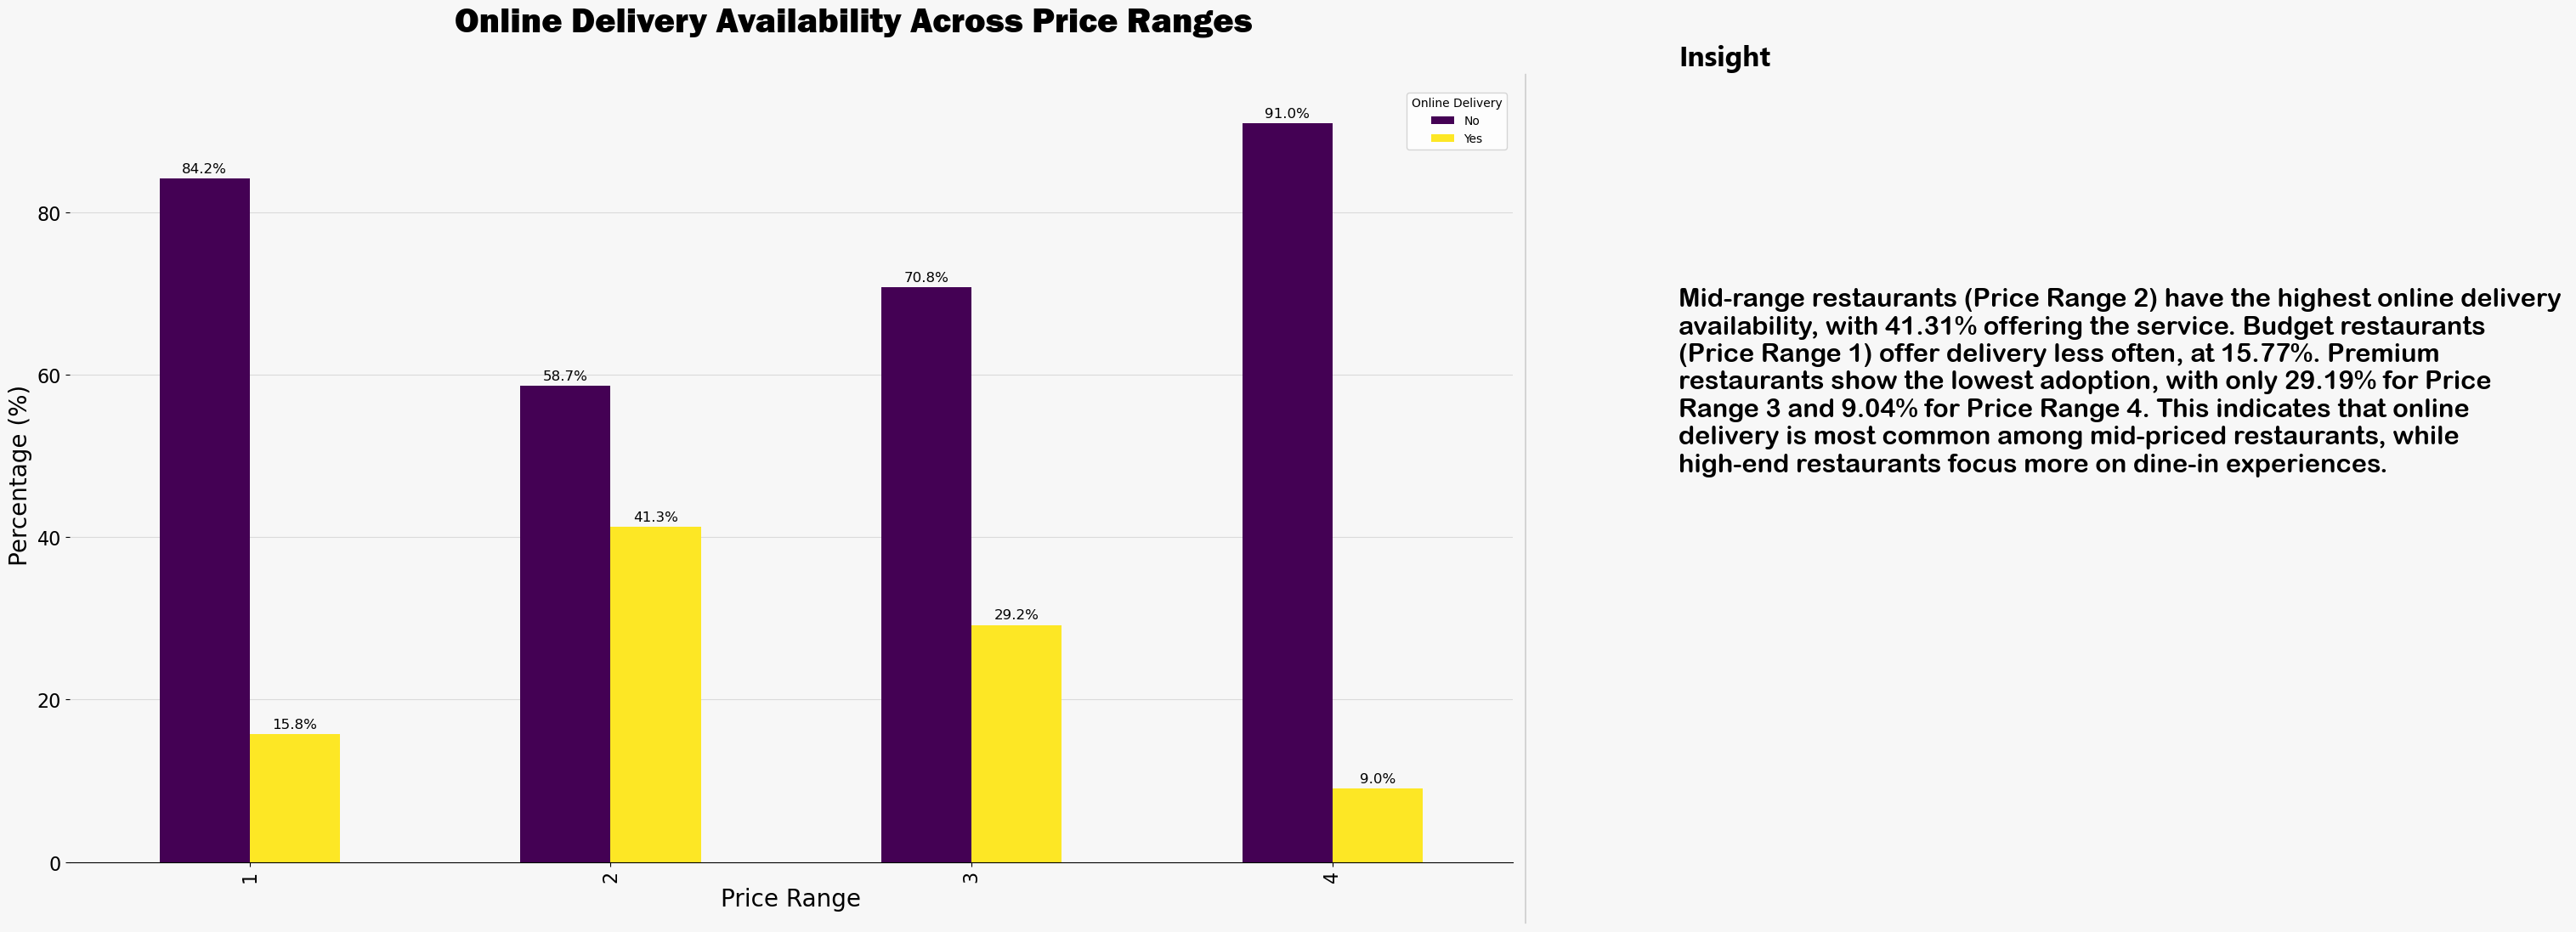

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(18, 10))

# Plot bar chart
online_delivery_by_price.plot(kind='bar',stacked=False,ax=ax,colormap='viridis')

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", fontsize=12, padding=3)

plt.xlabel("Price Range",fontsize=20)
plt.ylabel("Percentage (%)",fontsize=20)
plt.legend(title="Online Delivery")

apply_chart_styling(ax=ax,fig=fig,title="Online Delivery Availability Across Price Ranges",subtitle="",insight_text='''
Mid-range restaurants (Price Range 2) have the highest online delivery 
availability, with 41.31% offering the service. Budget restaurants 
(Price Range 1) offer delivery less often, at 15.77%. Premium 
restaurants show the lowest adoption, with only 29.19% for Price
Range 3 and 9.04% for Price Range 4. This indicates that online 
delivery is most common among mid-priced restaurants, while 
high-end restaurants focus more on dine-in experiences.
'''
)

plt.tight_layout()
plt.show()


--------------------------------------------------------------------------------------------------------------------------------------------------

## Task 2 : Price Range Analysis

#### 1. Determine the most common price range among all the restaurants.

In [21]:
price_range=df['Price range'].value_counts(normalize=True)*100
price_range

Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: proportion, dtype: float64

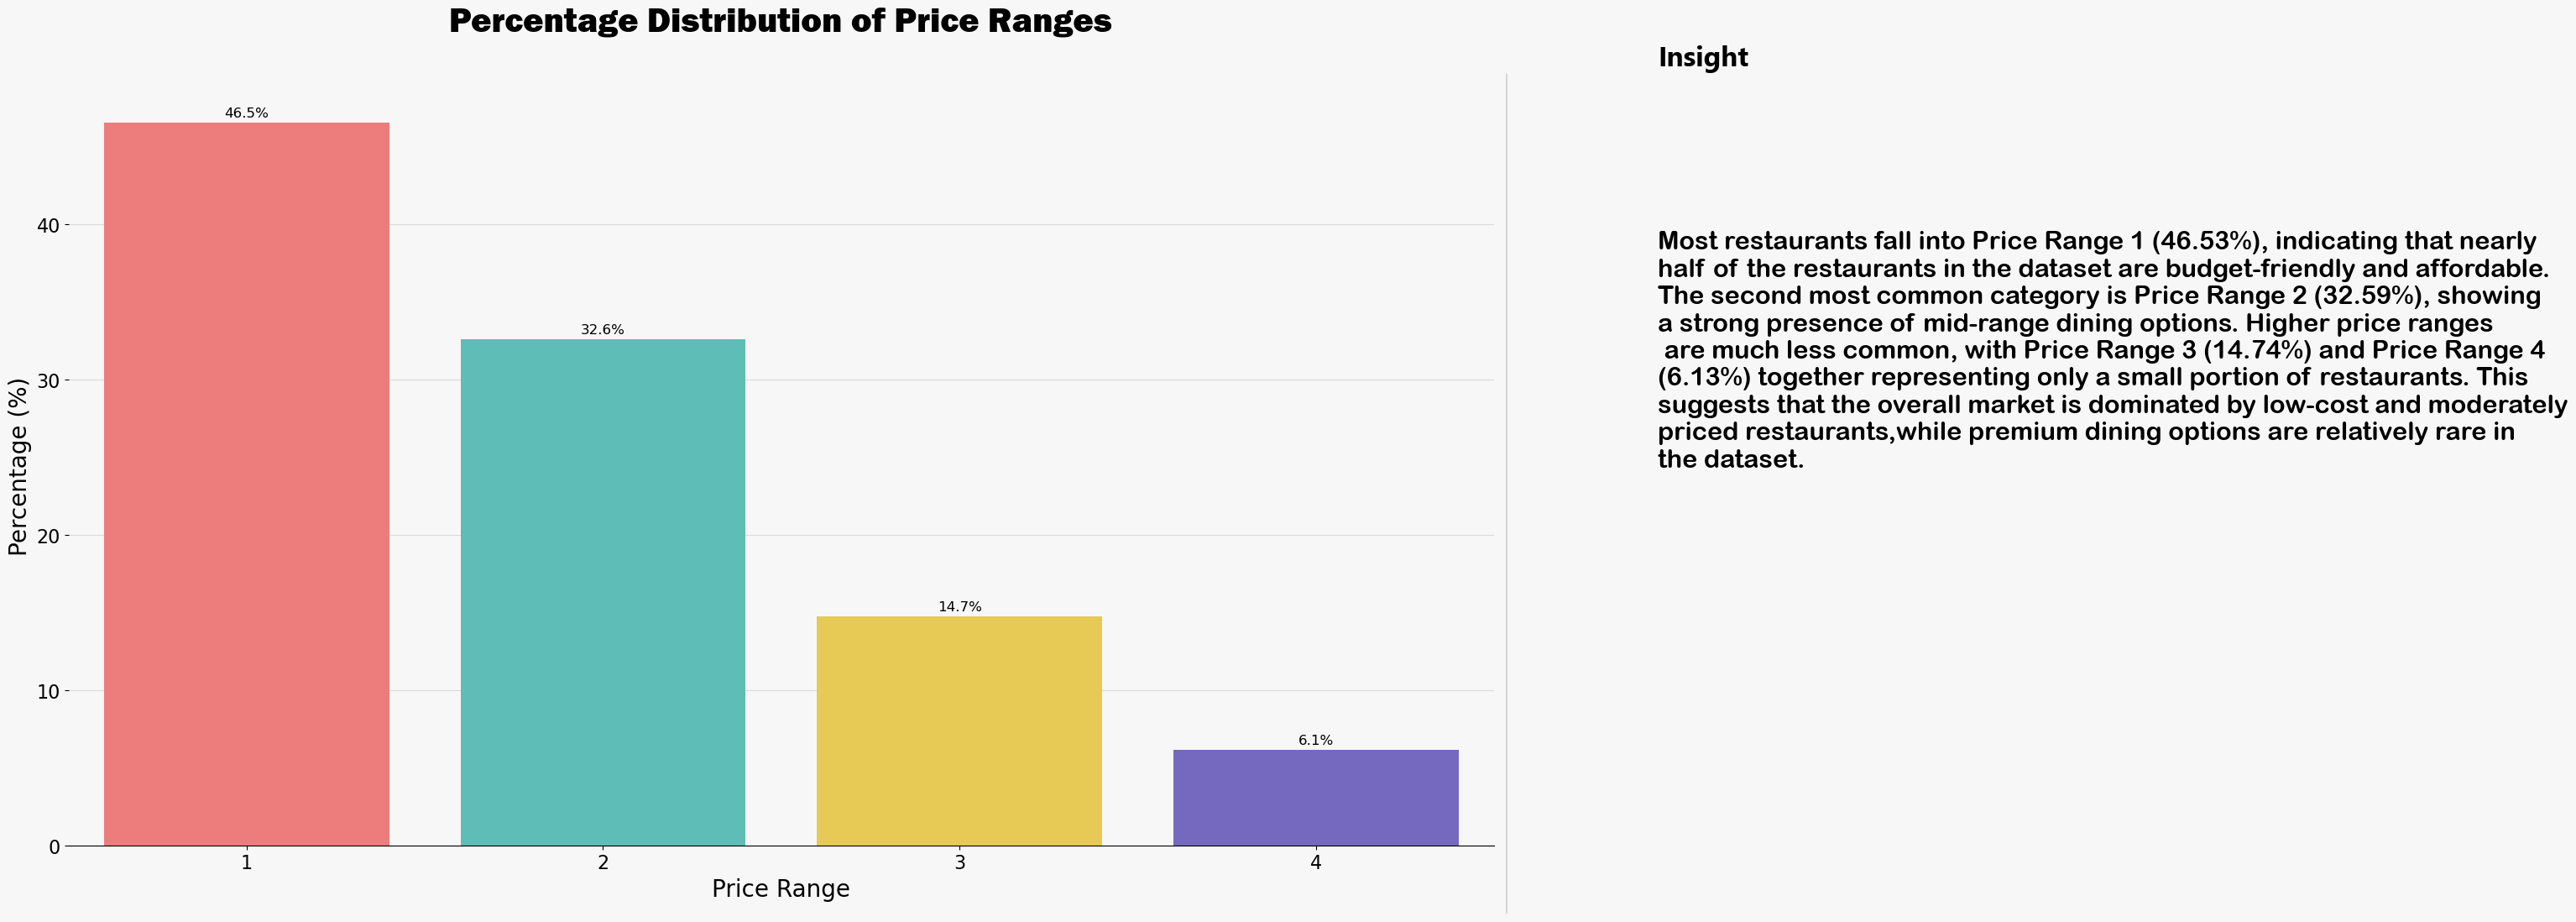

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(18, 10))

# Plot bar chart
ax = sns.barplot(x=price_range.index,y=price_range.values,ax=ax,palette=palette)
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", fontsize=12, padding=3)

plt.xlabel("Price Range",fontsize=20)
plt.ylabel("Percentage (%)",fontsize=20)

apply_chart_styling(ax=ax,fig=fig,title="Percentage Distribution of Price Ranges",subtitle="",insight_text='''
Most restaurants fall into Price Range 1 (46.53%), indicating that nearly
half of the restaurants in the dataset are budget-friendly and affordable.
The second most common category is Price Range 2 (32.59%), showing 
a strong presence of mid-range dining options. Higher price ranges
 are much less common, with Price Range 3 (14.74%) and Price Range 4  
(6.13%) together representing only a small portion of restaurants. This 
suggests that the overall market is dominated by low-cost and moderately
priced restaurants,while premium dining options are relatively rare in
the dataset.
'''
)

plt.tight_layout()
plt.show()


#### 2. Calculate the average rating for each price range.

In [23]:
avg_rating=df.groupby('Price range')['Aggregate rating'].mean().sort_values(ascending=False)
avg_rating


Price range
4    3.817918
3    3.683381
2    2.941054
1    1.999887
Name: Aggregate rating, dtype: float64

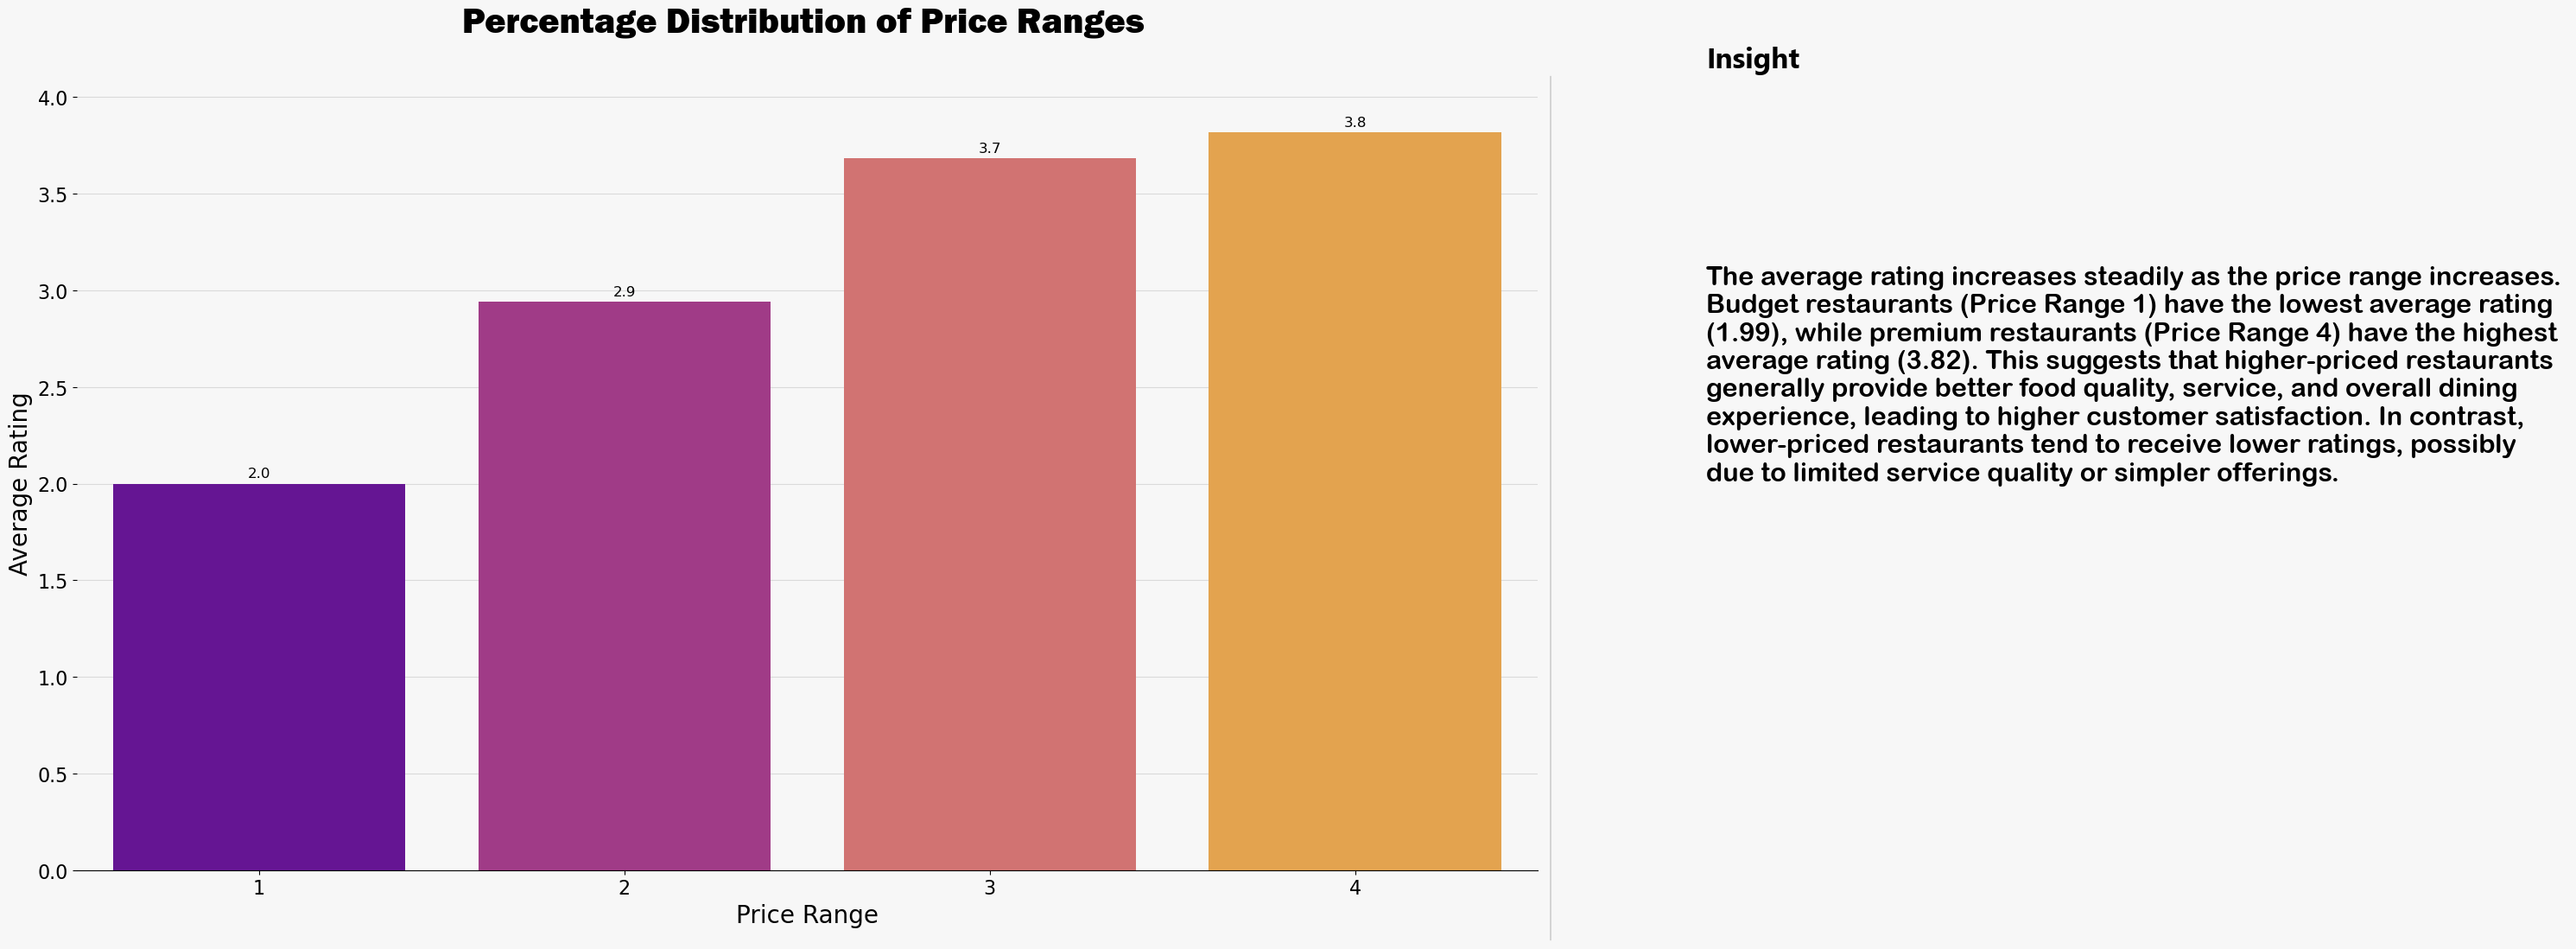

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(18, 10))

# Plot bar chart
ax = sns.barplot(x=avg_rating.index,y=avg_rating.values,ax=ax,palette='plasma')
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", fontsize=12, padding=3)

plt.xlabel("Price Range",fontsize=20)
plt.ylabel("Average Rating",fontsize=20)

apply_chart_styling(ax=ax,fig=fig,title="Percentage Distribution of Price Ranges",subtitle="",insight_text='''
The average rating increases steadily as the price range increases. 
Budget restaurants (Price Range 1) have the lowest average rating 
(1.99), while premium restaurants (Price Range 4) have the highest
average rating (3.82). This suggests that higher-priced restaurants
generally provide better food quality, service, and overall dining
experience, leading to higher customer satisfaction. In contrast,
lower-priced restaurants tend to receive lower ratings, possibly
due to limited service quality or simpler offerings.
'''
)

plt.tight_layout()
plt.show()


#### 3. Identify the color that represents the highest average rating among different price ranges.

In [25]:
df.groupby(['Price range', 'Rating color'])['Aggregate rating'].mean()

Price range  Rating color
1            Dark Green      4.668750
             Green           4.157639
             Orange          3.040464
             Red             2.293548
             White           0.000000
             Yellow          3.661842
2            Dark Green      4.627536
             Green           4.159385
             Orange          3.048491
             Red             2.300000
             White           0.000000
             Yellow          3.671159
3            Dark Green      4.646032
             Green           4.169231
             Orange          3.097764
             Red             2.305000
             White           0.000000
             Yellow          3.716265
4            Dark Green      4.709459
             Green           4.188144
             Orange          3.162376
             Red             2.283333
             White           0.000000
             Yellow          3.716000
Name: Aggregate rating, dtype: float64

### Insight

The color that represents the highest average rating among different price ranges is Dark Green, as it appears for the top-rated restaurants across the dataset.

## Task 3 : Feature Engineering

#### 1. Extract additional features from the existing columns, such as the length of the restaurant name or address.

In [26]:
# The length of the restaurant name
df['Length of name']=df['Restaurant Name'].str.len()

In [27]:
# The Length of address 
df['Address_length']=df['Address'].str.len()

In [28]:
# “Is Premium Restaurant” - Based on Price Range
df['is_premium'] = df['Price range'].apply(lambda x: 1 if x >= 3 else 0)


In [29]:
# Type of Restaurant
keywords = ["Cafe", "Bar", "Biryani", "Bakery", "Hotel", "Restaurant", 
            "Dhaba", "House", "Corner", "Grill", "Kitchen", "Lounge"]


In [30]:
def extract_restaurant_type(name):
    for word in keywords:
        if word.lower() in name.lower():
            return word
    return "Other"
    
df['Restaurant_type'] = df['Restaurant Name'].apply(extract_restaurant_type)


#### 3. Create new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables.

In [34]:
df[['Has Table booking','Has Online delivery']]

,Has Table booking,Has Online delivery
0,Yes,No
1,Yes,No
2,Yes,No
3,No,No
4,Yes,No
...,...,...
9546,No,No
9547,No,No
9548,No,No
9549,No,No


In [42]:
# Checking Unique Values
df['Has Table booking'].unique()

array(['Yes', 'No'], dtype=object)

In [44]:
# Checking Unique Values
df['Has Online delivery'].unique()

array(['No', 'Yes'], dtype=object)

In [36]:
# Encoding Categorical Features
df['Has Table Booking']=df['Has Table booking'].map({'Yes':1,'No':0})
df['Has Online Delivery']=df['Has Online delivery'].map({'Yes':1,'No':0})

In [45]:
df[['Has Table booking','Has Online delivery','Has Table Booking','Has Online Delivery']]

,Has Table booking,Has Online delivery,Has Table Booking,Has Online Delivery
0,Yes,No,1,0
1,Yes,No,1,0
2,Yes,No,1,0
3,No,No,0,0
4,Yes,No,1,0
...,...,...,...,...
9546,No,No,0,0
9547,No,No,0,0
9548,No,No,0,0
9549,No,No,0,0
